**INTRODUCTION**
------
Traffic accidents continue to be a major concern for public safety around the world, with numerous factors playing a role in their occurrence. Understanding the underlying patterns and key drivers of these accidents is essential for creating effective safety measures and policies. <br>
In this project, I employ unsupervised learning techniques, specifically Principal Component Analysis (PCA) and K-means clustering, to analyze traffic crash data. <br>
By simplifying the complexity of the dataset and identifying meaningful patterns, the goal is to uncover the most significant factors behind traffic accidents. The insights gained from this analysis can inform targeted interventions to improve road safety. <br>
Additionally, the methods used here offer valuable potential for applying similar models to other traffic datasets in real-world situations.

In [20]:
# Import the needed libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load the cleaned dataset
cleaned_road = pd.read_csv('C:/Users/acer/Desktop/Data_science_projects/cleaned_road_data.csv')

In [3]:
# Encode categorical features: Quarter and State
label_encoder = LabelEncoder()

cleaned_road['Quarter'] = label_encoder.fit_transform(cleaned_road['Quarter'])
cleaned_road['State'] = label_encoder.fit_transform(cleaned_road['State'])

In [4]:
# These are the columns we are interested in for analysis (numeric features)
numeric_features = ['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved', 
                    'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']

# We need to standardize the data to make sure all numbers are on the same scale.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_road[numeric_features])

In [5]:
# PCA (Principal Component Analysis) helps reduce the number of features while keeping the most important information.
# This will help us see the main patterns in the data in just two dimensions (for easy visualization).

pca = PCA(n_components=2)  # We want to reduce it to 2 dimensions
pca_result = pca.fit_transform(scaled_data)



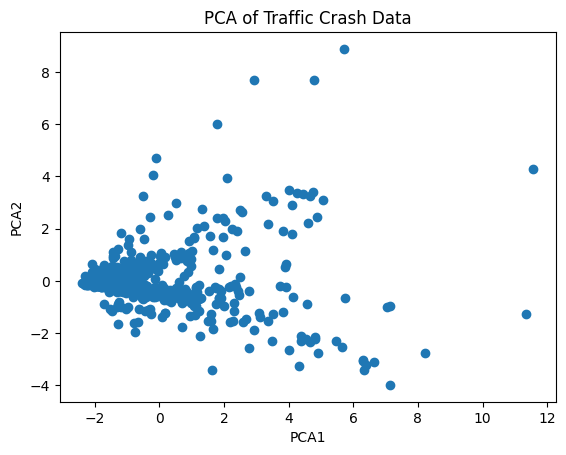

In [6]:
# Create a new table (DataFrame) with the two reduced dimensions.
# These two new columns represent the main patterns from our original data.
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Create a graph to show how the data looks after applying PCA.
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.title('PCA of Traffic Crash Data')  
plt.xlabel('PCA1')  # Label for the x-axis
plt.ylabel('PCA2')  # Label for the y-axis
plt.show()  

In [ ]:
# Access the components of the PCA
pca_components = pca.components_

# Create a DataFrame for better readability
pca_loadings = pd.DataFrame(
    pca_components.T,  # Transpose so that features are rows and components are columns
    columns=['PCA1', 'PCA2'],  # Name the components
    index=numeric_features  # Use your feature names as the index
)

# Display the loadings
print(pca_loadings)

                             PCA1      PCA2
Total_Crashes            0.446251  0.076354
Num_Injured              0.435004  0.116168
Num_Killed               0.381057  0.161784
Total_Vehicles_Involved  0.444788 -0.116254
SPV                      0.303786 -0.464087
DAD                      0.109183 -0.314746
PWR                      0.122639  0.438149
FTQ                      0.199177  0.597818
Other_Factors            0.331168 -0.277819


In [9]:
# Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance for each component
for i, variance in enumerate(explained_variance_ratio):
    print(f"PCA Component {i+1}: {variance:.2%} variance explained")

# Calculate the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print(f"Cumulative Variance Explained: {cumulative_variance[-1]:.2%}")

PCA Component 1: 50.09% variance explained
PCA Component 2: 18.52% variance explained
Cumulative Variance Explained: 68.61%


**PCA and Explained Variance:**

The PCA revealed that the first two components explain a substantial amount of the variance in the data, with PCA Component 1 accounting for 50.09% and PCA Component 2 explaining 18.52%. Together, these two components explained 68.61% of the total variance. This means that over 68% of the information in the dataset can be captured using just these two principal components, significantly reducing the complexity of the data without losing much essential information. 

**PCA Component Assessment:**

The components of the PCA highlight which factors contribute the most to each principal component:
* PCA Component 1: Total crashes, number of injuries, total vehicles involved, and other factors such as SPV (speed violation), PWR (poor weather), and FTQ (fatigue) are significantly influential. This suggests that common contributing factors to traffic accidents include road conditions, the number of vehicles involved, and typical crash characteristics such as speed.
* PCA Component 2: Factors like fatalities (Num_Killed) and specific conditions such as FTQ and DAD (driver attention/distracted driving) have stronger loadings on this component. This may indicate that accidents with severe consequences or rare conditions have a distinct set of influencing factors, such as distracted driving or fatigue.

In [15]:
# Using PCA results for clustering
X = pca_df[['PCA1', 'PCA2']]

In [16]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Add the labels to the PCA DataFrame for visualization
pca_df['Cluster'] = labels

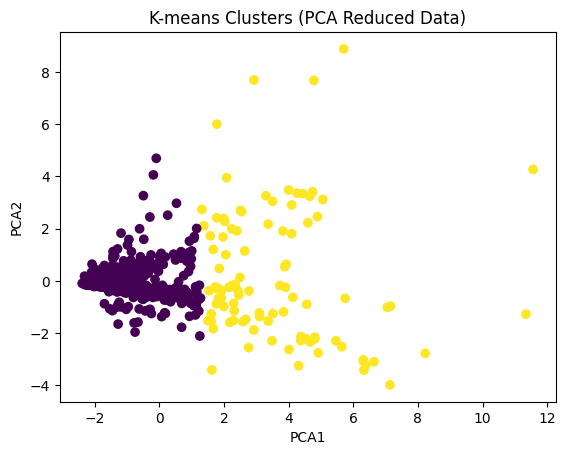

In [17]:
# Visualizing the clusters
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('K-means Clusters (PCA Reduced Data)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

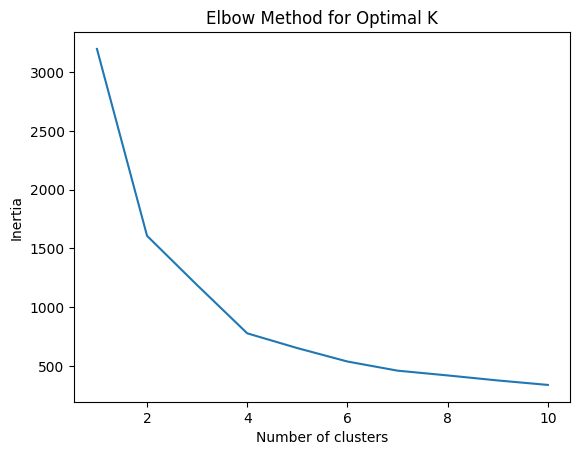

In [14]:
# Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**K-means Clustering on PCA Results:**

Using K-means clustering, I divided the data into two clusters. Cluster 0, the larger group, represents the majority of traffic accidents, suggesting that the majority of crashes share common contributing factors. These could include typical road conditions, common driving behaviors, or environmental factors. On the other hand, Cluster 1, the smaller group, represents a set of accidents that occur under more rare or specific conditions, possibly involving more complex interactions of factors such as severe weather, heavy vehicle involvement, or high-risk locations.



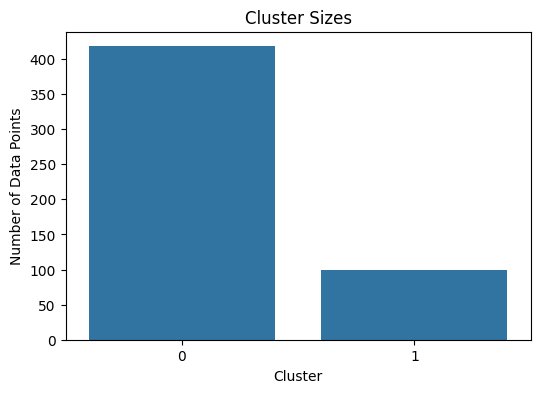

In [ ]:
# Cluster distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=kmeans.labels_)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

**Cluster Distribution Insights:**

The cluster distribution plot revealed that Cluster 0 contained the majority of data points, with over 400 occurrences, while Cluster 1 had only about 100points. <br>
This suggests that most accidents fall under the common conditions represented by Cluster 0, while Cluster 1 indicates a more specialized or high-risk scenario. While Cluster 0 is important for general safety measures and interventions, Cluster 1 warrants focused attention due to its rarity and potentially more severe consequences.

#### **CONCLUSION:**

By analyzing and interpreting traffic accident data in this way, It has help to identify not only the major contributing factors to accidents but also how these factors can vary in different conditions. <br>
This unsupervised learning model provides a comprehensive overview of the main dynamics at play and presents a clear basis for actionable recommendations aimed at reducing traffic accidents and improving road safety.
